<a href="https://colab.research.google.com/github/Ekaterina-31/Kursovaya-Chemical-Compounds/blob/main/3_ML_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_CC50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессия CC50

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Загрузка датасета

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/8 Классическое МО (ML)/Курсовая работа Хим соединения/df.xlsx')
df

,"IC50, mM","CC50, mM",SI,"IC50, mM_log","CC50, mM_log",SI_log,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Chi,Kappa,PEOE_VSA,SMR_VSA,SlogP_VSA,EState_VSA,VSA_EState
0,6.239374,175.482382,28.125000,1.979535,5.173221,3.371597,0.203662,0.203662,0.281677,0.881996,...,0,0.15,0,6.244950,0.872278,1.849596,1.656534,1.409310,1.363038,3.212521
1,0.771831,5.402819,7.000000,0.572014,1.856738,2.079442,0.120448,0.120448,0.388360,0.899521,...,0,0.15,0,6.601003,0.914682,1.350636,1.564823,1.654294,1.111547,3.036357
2,223.808778,161.142320,0.720000,5.415250,5.088474,0.542324,0.022420,0.022420,0.395171,0.900640,...,0,0.15,0,8.046121,1.065814,2.125484,1.729382,1.507932,1.261023,3.605910
3,1.705624,107.855654,63.235294,0.995333,4.690023,4.162553,0.203902,0.203902,0.284134,0.882400,...,0,0.20,0,6.474522,0.955535,1.899410,1.693357,1.444191,1.386790,3.236238
4,107.131532,139.270991,1.300000,4.683348,4.943576,0.832909,0.207807,0.207807,0.196742,0.868043,...,0,0.00,0,7.283966,1.008745,2.041540,2.036026,2.085103,1.578446,3.844661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,3.465739,3.583509,0.755660,0.779703,0.779703,0.034912,0.778814,...,0,0.00,0,6.341904,0.771707,1.858068,1.899974,2.107205,1.926522,3.177215
997,31.999934,33.999415,1.062484,3.496506,3.555331,0.723911,0.831164,0.831164,0.022036,0.752137,...,0,0.00,0,7.167030,1.037718,2.343830,2.191027,2.471311,2.163199,3.334032
998,30.999883,33.999458,1.096761,3.465732,3.555333,0.740394,0.857343,0.857343,0.019276,0.757941,...,0,0.00,0,7.909882,1.261307,2.678913,2.474751,2.781308,2.369348,3.486369
999,31.998959,32.999644,1.031272,3.496476,3.526350,0.708662,0.845478,0.845478,0.106566,0.667368,...,0,0.00,0,7.060575,1.358744,2.691922,2.348154,2.608160,2.111231,3.344150


## Подготовка данных для обучения модели

In [ ]:
# исключаем прочие целевые переменные
df = df.drop(columns=['IC50, mM', 'CC50, mM', 'SI', 'IC50, mM_log', 'SI_log'])

In [ ]:
# выделяем вектор признаков и вектор целевой переменной
X = df.drop(columns=['CC50, mM_log'])
y = df['CC50, mM_log']

## Выбор лучшей модели без гиперпараметров

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Список моделей
models = {
    "LinearRegression": LinearRegression(),
    # "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    # "SVR": SVR(),
    "xgb": xgb.XGBRegressor(),
    "CatBoost": CatBoostRegressor()
}

In [ ]:
%%time
from sklearn.model_selection import cross_validate
import numpy as np

results = {}

# Тестируем все модели
for name, model in models.items():
    # расчет с несколькими метриками
    scoring = ['neg_mean_squared_error', 'r2']
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)

    # Сохраняем результаты
    results[name] = {
        'MSE': -np.mean(scores['test_neg_mean_squared_error']),  # инвертируем знак MSE
        'R²': np.mean(scores['test_r2'])
    }

results_df = pd.DataFrame.from_dict(results, orient='index')

Выходные данные были обрезаны до нескольких последних строк (5000).
6:	learn: 1.4512652	total: 145ms	remaining: 20.6s
7:	learn: 1.4398124	total: 159ms	remaining: 19.7s
8:	learn: 1.4272407	total: 173ms	remaining: 19s
9:	learn: 1.4154076	total: 187ms	remaining: 18.5s
10:	learn: 1.4049293	total: 203ms	remaining: 18.2s
11:	learn: 1.3935898	total: 216ms	remaining: 17.8s
12:	learn: 1.3839388	total: 229ms	remaining: 17.4s
13:	learn: 1.3753521	total: 242ms	remaining: 17s
14:	learn: 1.3677234	total: 255ms	remaining: 16.8s
15:	learn: 1.3604625	total: 268ms	remaining: 16.5s
16:	learn: 1.3528903	total: 281ms	remaining: 16.2s
17:	learn: 1.3440639	total: 294ms	remaining: 16s
18:	learn: 1.3381640	total: 307ms	remaining: 15.9s
19:	learn: 1.3314034	total: 320ms	remaining: 15.7s
20:	learn: 1.3242014	total: 333ms	remaining: 15.5s
21:	learn: 1.3153570	total: 347ms	remaining: 15.4s
22:	learn: 1.3080348	total: 361ms	remaining: 15.3s
23:	learn: 1.3023987	total: 375ms	remaining: 15.2s
24:	learn: 1.2958068	tot

In [ ]:
results_df

,MSE,R²
LinearRegression,3.958619,-0.743131
RandomForest,2.579234,-0.134633
KNN,3.180629,-0.381080
xgb,2.718505,-0.204517
CatBoost,2.491514,-0.096805


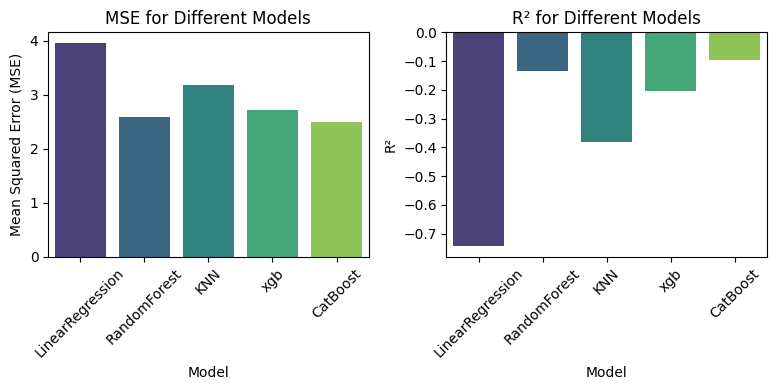

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Диаграмма для MSE
sns.barplot(x=results_df.index, y=results_df['MSE'], palette='viridis', ax=ax[0])
ax[0].set_title('MSE for Different Models')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].tick_params(axis='x', rotation=45)  # поворот меток на оси x

# Диаграмма для R²
sns.barplot(x=results_df.index, y=results_df['R²'], palette='viridis', ax=ax[1])
ax[1].set_title('R² for Different Models')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R²')
ax[1].tick_params(axis='x', rotation=45)  # поворот меток на оси x

# Подгоняем элементы графика
plt.tight_layout()
plt.show()

## Выбор лучшей модели с гиперпараметрами

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Test dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (800, 129), (800,)
Test dataset size: (201, 129), (201,)


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor
from skopt import BayesSearchCV

# Список моделей и их гиперпараметров
models = {
    "LinearRegression": (LinearRegression(), {
        'fit_intercept': [True, False],
        'n_jobs': [-1, 1, 5, 10],
    }),
    # "DecisionTree": (DecisionTreeRegressor(), {
        # 'max_depth': (1, 20),
        # 'min_samples_split': (2, 10),
    # }),
    "RandomForest": (RandomForestRegressor(), {
        'n_estimators': (180, 250),
        'max_depth': (20, 35),
        'min_samples_split': (3, 10),
        'min_samples_leaf': (1, 5),
    }),
    "KNN": (KNeighborsRegressor(), {
        'n_neighbors': (1, 20),
        'weights': ['uniform', 'distance'],
    }),
    # "SVR": (SVR(), {
        # 'model__C': (0.1, 100.0, 'log-uniform'),
        # 'model__epsilon': (0.01, 1.0, 'log-uniform'),
        # 'model__kernel': ['linear', 'rbf', 'poly']
    # })
    "xgb": (xgb.XGBRegressor(), {
        'n_neighbors': (35, 60),
        'max_depth': (1, 20),
    }),
    "CatBoost": (CatBoostRegressor(), {
        'n_estimators': (120, 250),
        'depth': (1, 10),
    }),
}

In [ ]:
%%time
# Перебор моделей
best_model = None
best_score = -float("inf")
best_params = {}

results = []

def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return {'MSE': mse, 'MAE': mae}

for name, (model, params) in models.items():

    # Байесовская оптимизация гиперпараметров
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=params,
        n_iter=15,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )

    # Обучение модели
    bayes_search.fit(X_train, y_train)

    y_pred = bayes_search.predict(X_test)

    scores = evaluate_model(y_test, y_pred)

    # Проверка, стала ли эта модель лучшей
    if bayes_search.best_score_ > best_score:
        best_score = bayes_search.best_score_
        best_model = name
        best_params = bayes_search.best_params_

    results.append({
    'Модель': name,
    'R²': bayes_search.best_score_,
    'MSE': scores['MSE'],
    'MAE': scores['MAE'],
    'Гиперпараметры': bayes_search.best_params_,
    })

Learning rate set to 0.121995
0:	learn: 1.5402574	total: 13.6ms	remaining: 3.38s
1:	learn: 1.5010563	total: 26.9ms	remaining: 3.34s
2:	learn: 1.4776389	total: 44ms	remaining: 3.62s
3:	learn: 1.4563872	total: 59.2ms	remaining: 3.64s
4:	learn: 1.4252172	total: 72.1ms	remaining: 3.53s
5:	learn: 1.4065801	total: 86.6ms	remaining: 3.52s
6:	learn: 1.3861049	total: 92.1ms	remaining: 3.2s
7:	learn: 1.3625238	total: 98ms	remaining: 2.96s
8:	learn: 1.3426325	total: 103ms	remaining: 2.77s
9:	learn: 1.3278556	total: 109ms	remaining: 2.61s
10:	learn: 1.3119776	total: 114ms	remaining: 2.48s
11:	learn: 1.2962703	total: 120ms	remaining: 2.37s
12:	learn: 1.2850683	total: 125ms	remaining: 2.28s
13:	learn: 1.2725640	total: 130ms	remaining: 2.19s
14:	learn: 1.2665839	total: 136ms	remaining: 2.12s
15:	learn: 1.2595292	total: 141ms	remaining: 2.06s
16:	learn: 1.2536062	total: 146ms	remaining: 2s
17:	learn: 1.2488554	total: 152ms	remaining: 1.96s
18:	learn: 1.2411349	total: 158ms	remaining: 1.92s
19:	learn: 

In [ ]:
pd.DataFrame(results)

,Модель,R²,MSE,MAE,Гиперпараметры
0,LinearRegression,0.164097,1.524942,0.895806,"{'fit_intercept': False, 'n_jobs': 10}"
1,RandomForest,0.418783,1.363214,0.831386,"{'max_depth': 31, 'min_samples_leaf': 5, 'min_..."
2,KNN,0.320970,1.445274,0.775705,"{'n_neighbors': 7, 'weights': 'distance'}"
3,xgb,0.396662,1.388904,0.841473,"{'max_depth': 2, 'n_neighbors': 60}"
4,CatBoost,0.427561,1.238629,0.778977,"{'depth': 4, 'n_estimators': 250}"


In [ ]:
# Вывод лучшей модели
print("Лучшая модель:", best_model)
print("Лучшие параметры:", best_params)
print("Лучший R²:", best_score)

Лучшая модель: CatBoost
Лучшие параметры: OrderedDict([('depth', 4), ('n_estimators', 250)])
Лучший R²: 0.42756055775514906


## Подбор гиперпараметров для выбранной модели

In [ ]:
%%time
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Определяем модель
cb_model = CatBoostRegressor(random_state=42)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [230, 250, 280, 300],
    'depth': [2, 5, 8],
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Обучение на всех данных
grid_search.fit(X_train, y_train)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Learning rate set to 0.121995
0:	learn: 1.5323247	total: 9.13ms	remaining: 2.27s
1:	learn: 1.4911063	total: 17.4ms	remaining: 2.15s
2:	learn: 1.4507851	total: 27.4ms	remaining: 2.25s
3:	learn: 1.4207289	total: 37ms	remaining: 2.27s
4:	learn: 1.3987435	total: 45.2ms	remaining: 2.21s
5:	learn: 1.3699639	total: 53.4ms	remaining: 2.17s
6:	learn: 1.3491488	total: 61.8ms	remaining: 2.15s
7:	learn: 1.3233162	total: 69.9ms	remaining: 2.12s
8:	learn: 1.3133844	total: 78.1ms	remaining: 2.09s
9:	learn: 1.3017181	total: 86.1ms	remaining: 2.06s
10:	learn: 1.2897774	total: 94.5ms	remaining: 2.05s
11:	learn: 1.2784239	total: 102ms	remaining: 2.03s
12:	learn: 1.2651133	total: 110ms	remaining: 2.01s
13:	learn: 1.2474753	total: 119ms	remaining: 2.01s
14:	learn: 1.2263010	total: 127ms	remaining: 1.99s
15:	learn: 1.2139745	total: 135ms	remaining: 1.98s
16:	learn: 1.2055257	total: 143ms	remaining: 1.97s
17:	learn: 1.1918521	total: 152ms	remaining

In [ ]:
# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

print(f"Best score (R²): {best_score:.4f}")

Best parameters found:  {'depth': 5, 'n_estimators': 250}
Best score (R²): 0.4260


## Предсказание на всех данных

In [ ]:
# сделаем предсказания на тесте
y_pred = best_model.predict(X)

# y - это правильные ответы для X
print(f'R²: {r2_score(y, y_pred)}')

R²: 0.7409962833631584
